In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLBA import LBAModel, LBAParameters

In [10]:
# Create model and parameters
model = LBAModel()

original_params = LBAParameters(
    A=4,
    b=[6, 10, 20],
    v=1,
    s=1,
    tau=0
)

print(f"Model: {model.name}")
print(f"Parameters: {original_params}")

Model: Linear Ballistic Accumulator
Parameters: LBAParameters(A=4.0, b=array([ 6, 10, 20]), v=1.0, s=1.0, tau=0.0)


In [11]:
from pyLBA.synthetic import generate_LBA

In [12]:
# Generate synthetic data
data = generate_LBA(n_trials=200,
                    parameters=original_params,
                    n_acc=3,
                    seed=42) # For reproducibility
# Display first few rows
print(f"\n   First few rows of generated data:")
print(data.head())

[4. 4. 4.] [ 6 10 20] [1. 1. 1.] [1. 1. 1.] [0. 0. 0.]

   First few rows of generated data:
         rt  response
0  1.291922         0
1  5.678374         0
2  1.881697         0
3  2.795100         0
4  4.115980         0


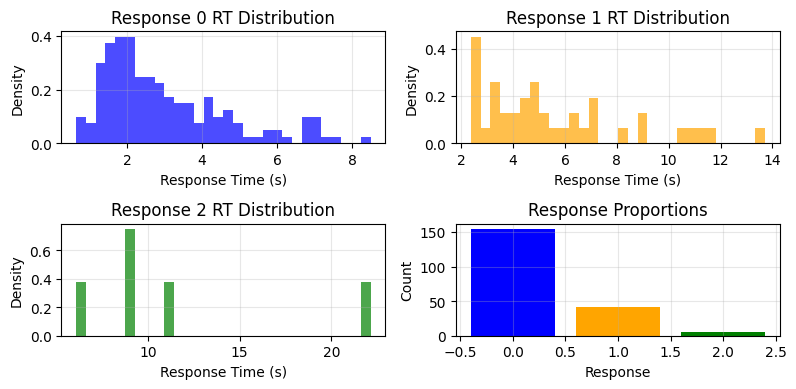

In [16]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(8, 4))

# RT histograms by response
responses = sorted(data['response'].unique())
colors = ['blue', 'orange', 'green']

for i, response in enumerate(responses):
    if i < 3:  # Only plot first 3 responses
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        
        subset = data[data['response'] == response]
        ax.hist(subset['rt'], bins=30, alpha=0.7, color=colors[i], density=True)
        ax.set_title(f'Response {response} RT Distribution')
        ax.set_xlabel('Response Time (s)')
        ax.set_ylabel('Density')
        ax.grid(True, alpha=0.3)

# Response proportions
response_counts = data['response'].value_counts().sort_index()
axes[1, 1].bar(response_counts.index, response_counts.values, color=colors[:len(response_counts)])
axes[1, 1].set_title('Response Proportions')
axes[1, 1].set_xlabel('Response')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
import pymc as pm
import arviz as az

In [ ]:
custom_priors = {
    'A': 4,
    'v': 1,
    's': 1,
    'tau': 0
}


fitted_model = model.fit_mcmc(
    data=data,
    priors=custom_priors,
    draws=200,      # Reduced for faster demo
    tune=200,       # Reduced for faster demo
    chains=2,       # Reduced for faster demo
    cores=2,
    progressbar=True
)